<a href="https://colab.research.google.com/github/dansojo/Medical_CV/blob/main/US_Median_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**목표: 초음파 이미지에 특유의 Speckle Noise를 줄여 이미지 품질을 개선하고, 중요한 경계를 보존하는 것이 목표입니다.**

In [3]:
import cv2
import matplotlib.pyplot as plt
from skimage import io

In [4]:
# 원본 이미지 로드

image_path = '/content/drive/MyDrive/Medical_CV/Ultrasound (US)/US 이미지/benign (107).png'  # 이미지 경로 설정
us_image = io.imread(image_path, as_gray=True)

In [5]:
#  원본 이미지 데이터 확인
print(f"Original us_image - Min Value: {us_image.min()}, Max Value: {us_image.max()}")
print(f"Original us_image - Data Type: {us_image.dtype}")
print(f"Original us_image - Shape: {us_image.shape}")

Original us_image - Min Value: 0.0, Max Value: 1.0
Original us_image - Data Type: float64
Original us_image - Shape: (616, 759)


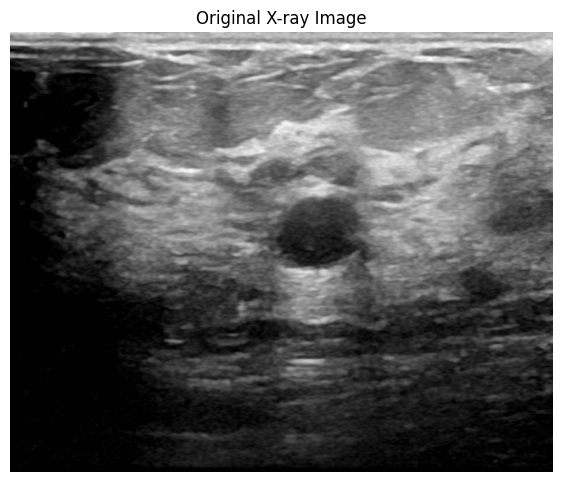

In [6]:
# 원본 이미지 시각화

plt.figure(figsize=(7, 7))
plt.imshow(us_image, cmap='gray')
plt.title("Original X-ray Image")
plt.axis('off')
plt.show()

In [7]:
# 2. uint8 형식으로 변환
us_image_uint8 = (us_image * 255).astype('uint8')

In [8]:
# Median Filtering 적용 (커널 크기: 5)
# Median Filtering은 이미지의 픽셀 값 중 주변 픽셀의 중간값(중앙값)을 선택하여,
# 갑작스러운 노이즈나 작은 점들을 제거한다.

# Gaussian Filtering에 비해 경계가 잘 보존되므로,
# 병변의 경계를 강조하면서 노이즈를 줄이고자 할 때 적합.
# Speckle Noise 노이즈 제거에 효과적

# 커널의 크기로 필터의 강도를 설정하며, 커널의 크기가 클수록 더 많은 노이즈를 제거하지만,
# 이미지가 부드러워져 이미지 디테일이 흐려질 수 있다.
# 랜덤 노이즈가 많은 경우에는 한계점이 존재하여 Gaussian Filtering에 비해 성능이 떨어질 수 있다.
# Gaussian Filtering에 비해 속도가 느릴 수 있다.

# 커널의 크기는 3,5,7 처럼 홀수여야 한다.

In [9]:
median_filtered_image = cv2.medianBlur(us_image_uint8, ksize=5)

**전처리 전후 이미지 비교**

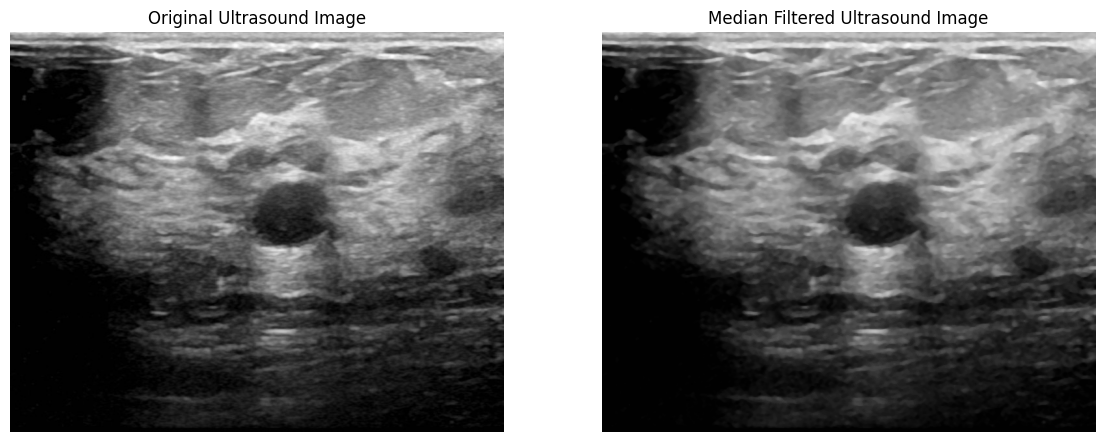

In [10]:
plt.figure(figsize=(14, 7))

# 원본 초음파 이미지
plt.subplot(1, 2, 1)
plt.imshow(us_image, cmap='gray')
plt.title("Original Ultrasound Image")
plt.axis('off')

# Median 필터링 적용 이미지
plt.subplot(1, 2, 2)
plt.imshow(median_filtered_image, cmap='gray')
plt.title("Median Filtered Ultrasound Image")
plt.axis('off')

plt.show()